In [3]:
!pip install nltk

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 

In [9]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)


In [10]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']


In [11]:
train_data = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=categories, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [12]:
print(type(train_data))
print(train_data.keys())
print(train_data.data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
print(len(train_data.data))
print(len(test_data.data))

4732
3150


In [102]:
train_data_for_plot = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=None, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
print(len(train_data_for_plot.target_names))

20


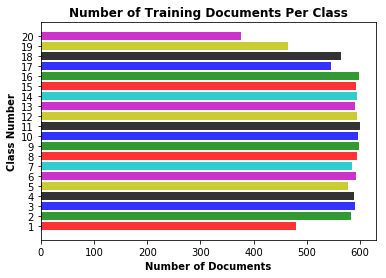

In [114]:
import matplotlib.pyplot as plt

indices = np.arange(20)
no_of_datapoints = []
for i in range(0, len(train_data_for_plot.target_names)):
    no_of_datapoints.append((train_data_for_plot.target == i).sum())


bar_width = 0.75
colors = 'rgbkymc'
bars = plt.barh(indices, no_of_datapoints, bar_width,alpha = 0.8, color = colors, align="edge")
plt.xlabel('Number of Documents', fontweight="bold", )
plt.ylabel('Class Number', fontweight="bold")
plt.title('Number of Training Documents Per Class', fontweight="bold")
plt.yticks(indices + bar_width/2, list(range(1, 21)))
plt.show()


In [4]:
import nltk
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')

print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of stop_words_en:\t\t %s" % len(stop_words_en))

from string import punctuation
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print("# of combined_stopwords:\t %s" % len(combined_stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...


# of stop_words_skt:		 318
# of stop_words_en:		 179
# of punctuation:		 32
# of combined_stopwords:	 410


[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('He is walking to school'))
print(walking_tagged)
print("mapping to Verb, Noun, Adjective, Adverbial")

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

lemmatize_sent_demo('He is walking to school')

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


['he', 'be', 'walk', 'to', 'school']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=3,analyzer=stem_rmv_punc, stop_words='english')
X_train_counts = count_vect.fit_transform(train_data.data)
print(X_train_counts.shape)



(4732, 16292)


In [26]:
X_test_counts = count_vect.transform(test_data.data)
print(X_test_counts.shape)

(3150, 16292)


In [14]:
count_vect2 = CountVectorizer(min_df=3, stop_words='english')
X_train_counts2 = count_vect2.fit_transform(train_data.data)
print(X_train_counts2.shape)

(4732, 20297)


In [16]:
print(count_vect.get_feature_names())

['0005111312na1em', '0010580b', '002251w', '0096b0f0', '00bjgood', '00mbstultz', '00pm', '02uv', '03hz', '03k', '05apr93', '05l', '06eh', '06paul', '0_', '0___', '0a', '0b', '0b14', '0c', '0d', '0d2', '0df', '0e', '0ek', '0f', '0g', '0g8', '0h', '0hd', '0i', '0iv', '0ivbudk', '0j', '0k', '0l', '0m', '0m75u', '0m8b', '0mk', '0n', '0o', '0p', '0q', '0qax', '0qq', '0r', '0sl', '0t', '0tbxn', '0tbxom', '0tq', '0tq6', '0u', '0v', '0va', '0w', '0x', '0x100', '0y', '0z', '1000cc', '100k', '100mph', '101e', '1024x768', '1024x768x16', '1024x768x256', '1024x768x65536', '106ps', '10h', '10k', '10mb', '10min', '10pm', '10th', '10w', '10w40', '115a', '11h', '11k', '11th', '1200cc', '120km', '120mb', '120mph', '125mb', '1280x1024', '128k', '12a', '12cyl', '12k', '12mb', '12ms', '12v', '1304s', '130mph', '132mb', '13h', '13k', '13p', '13q', '13qm', '13qs', '13s1', '13th', '145s', '14di', '14dm75u', '14th', '1500mb', '150k', '152944br4416a', '1542b', '15apr93', '15k', '15m', '15mill', '15mph', '15ms',

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(4732, 16292)


In [28]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(3150, 16292)


In [29]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
print(X_train_reduced.shape)

(4732, 50)


In [31]:
X_test_reduced = svd.transform(X_test_tfidf)
print(X_test_reduced.shape)

(3150, 50)


In [34]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random', random_state=0)
X_train_reduced_nmf = nmf.fit_transform(X_train_tfidf)
print(X_train_reduced_nmf.shape)

(4732, 50)


In [35]:
X_test_reduced_nmf = nmf.transform(X_test_tfidf)
print(X_test_reduced_nmf.shape)

(3150, 50)
